In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Loan_application.csv')
df.head()

Age  Salary  Education  Capital  Loan
0   19   19000          0        2     0
1   35   20000          0        2     0
2   26   43000          0        0     0
3   27   57000          0        0     0
4   19   76000          1        0     0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.head()

Age  Salary  Education  Capital  Loan
0   19   19000          0        2     0
1   35   20000          0        2     0
2   26   43000          0        0     0
3   27   57000          0        0     0
4   19   76000          1        0     0

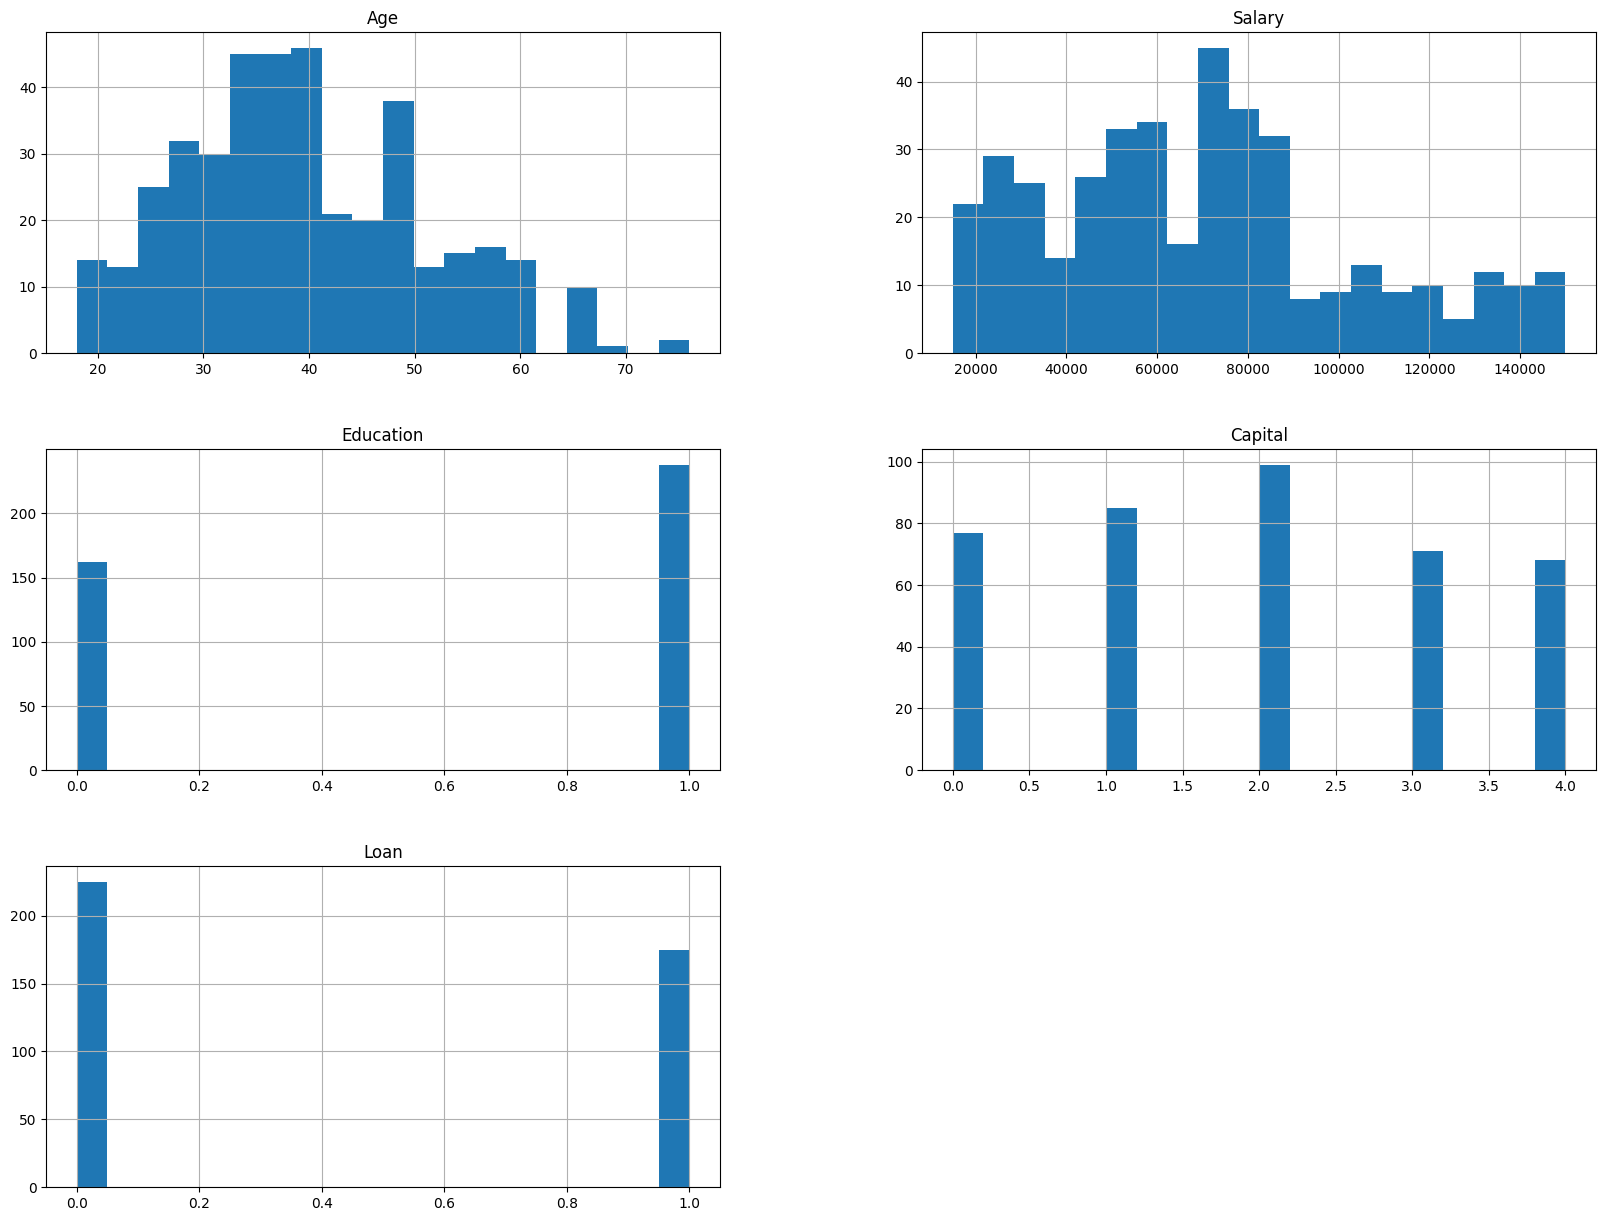

In [4]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

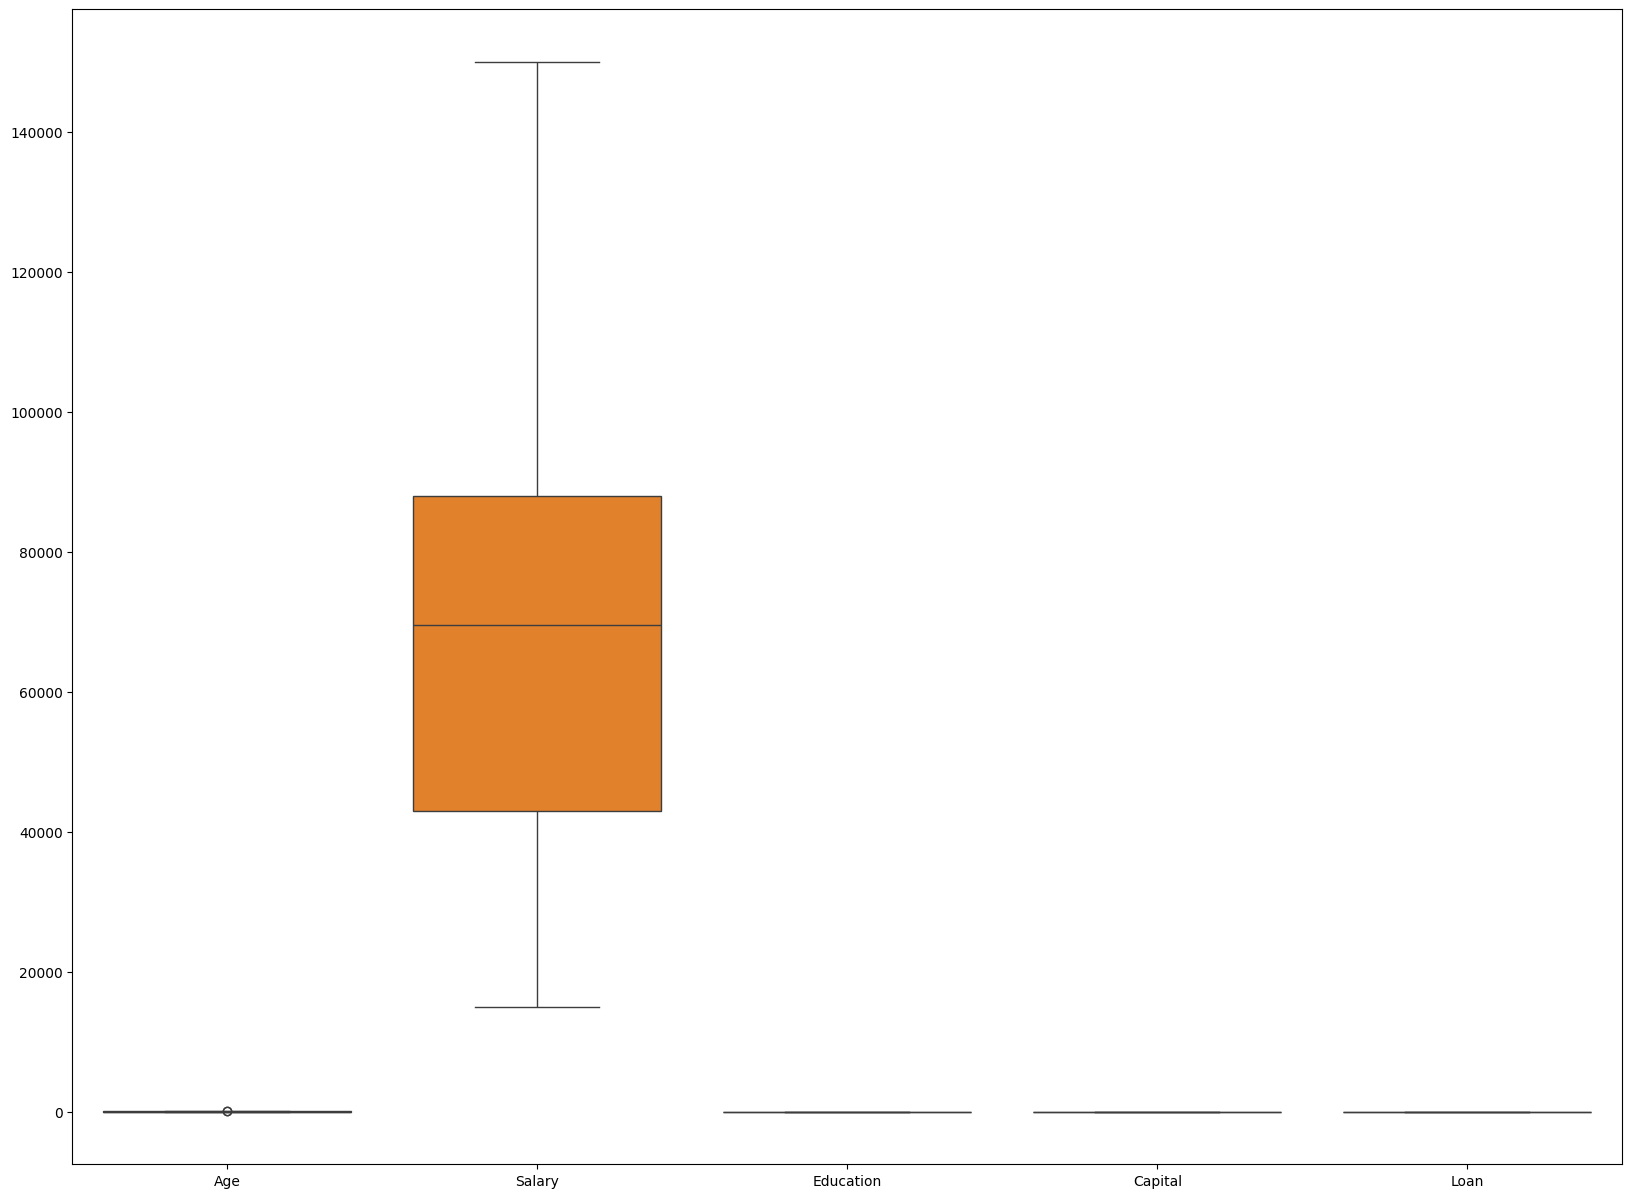

In [5]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=df)
plt.show()

In [7]:
print(df.columns.tolist())

['Age', 'Salary', 'Education', 'Capital', 'Loan']


In [8]:
df.columns = df.columns.str.strip()

In [9]:
print(df.head())

   Age  Salary  Education  Capital  Loan
0   19   19000          0        2     0
1   35   20000          0        2     0
2   26   43000          0        0     0
3   27   57000          0        0     0
4   19   76000          1        0     0


In [11]:
print(df.columns.tolist())

['Age', 'Salary', 'Education', 'Capital', 'Loan']


In [12]:
for col in df.columns:
    print(f"'{col}'")

'Age'
'Salary'
'Education'
'Capital'
'Loan'


In [13]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  # Replaces multiple spaces with a single space

In [14]:
print(df.head())

   Age  Salary  Education  Capital  Loan
0   19   19000          0        2     0
1   35   20000          0        2     0
2   26   43000          0        0     0
3   27   57000          0        0     0
4   19   76000          1        0     0


In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=df)
plt.show()

ValueError: Could not interpret value `GRE Score` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [18]:
missing_values = df.isnull().sum()
print(missing_values)

Age          0
Salary       0
Education    0
Capital      0
Loan         0
dtype: int64


In [19]:
df.fillna(df.mean(), inplace=True)

In [20]:
df.dropna(inplace=True)

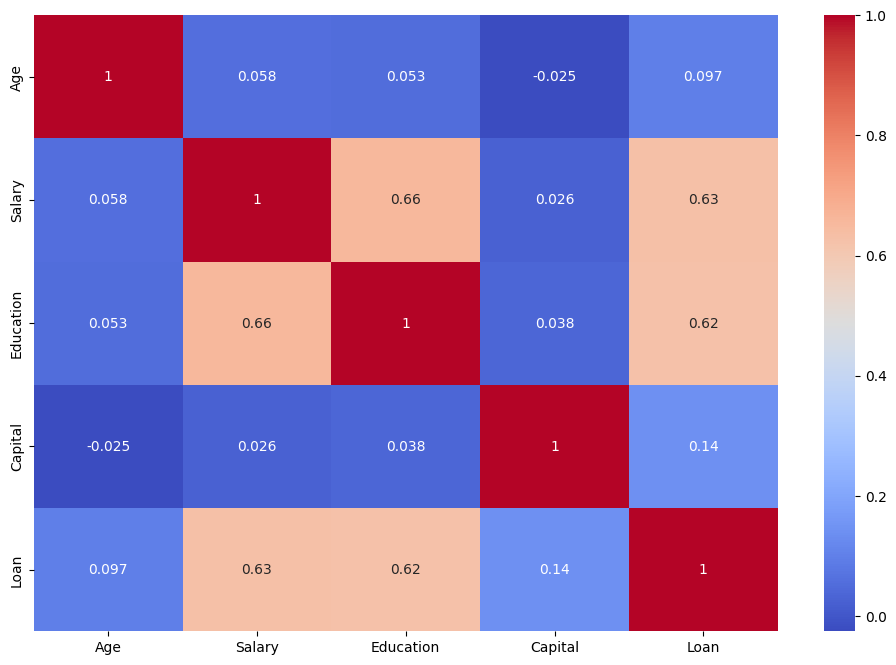

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='University Rating', data=df)
plt.title('Distribution of University Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GRE Score', y='GPA', hue='University Rating', data=df)
plt.title('GRE Scores vs GPA by University Rating')
plt.show()

ValueError: Could not interpret value `University Rating` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

KeyError: 'University Rating'

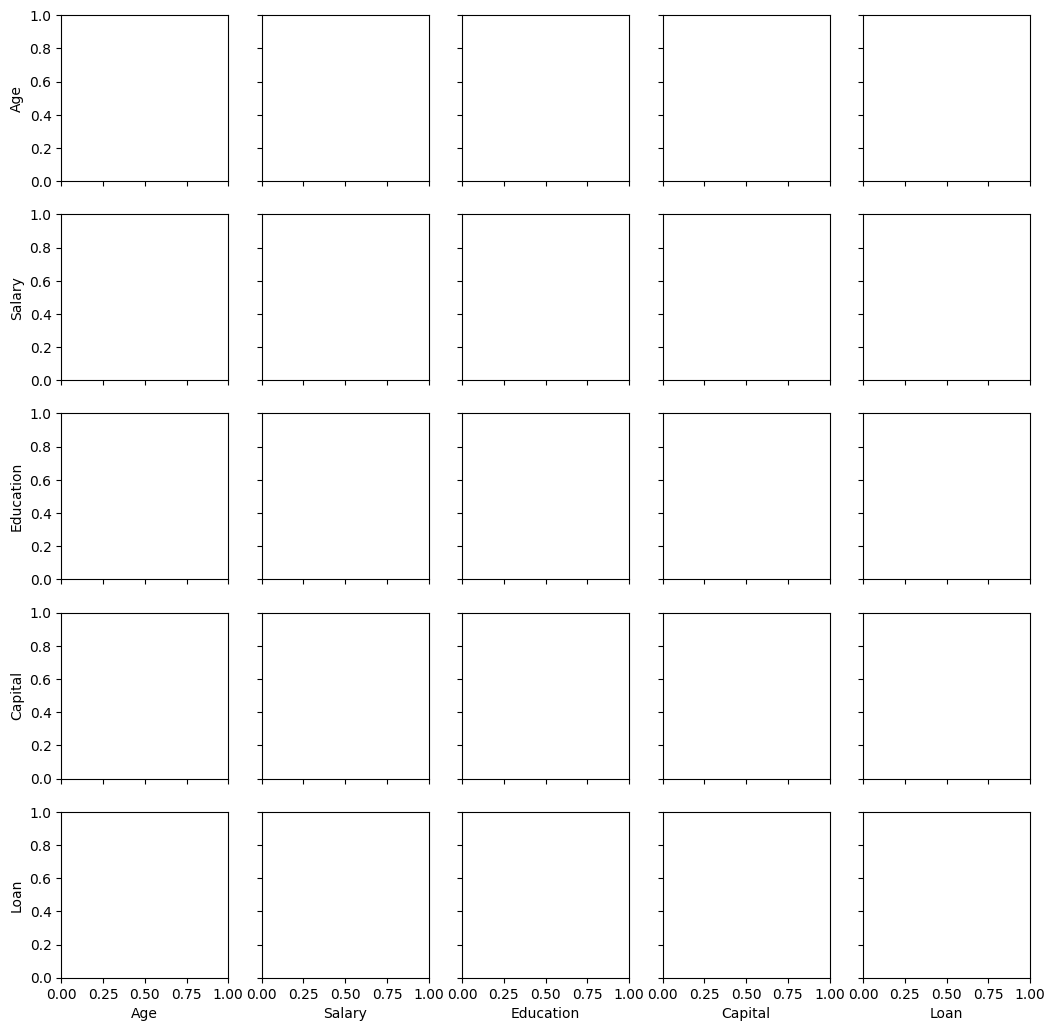

In [23]:
sns.pairplot(df, hue='University Rating')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyError: "['Chance of Admit'] not found in axis"

In [26]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
print(f'Logistic Regression Accuracy: {log_accuracy}')

NameError: name 'X_train' is not defined

In [27]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)
print(f'Decision Tree Accuracy: {tree_accuracy}')

NameError: name 'X_train' is not defined

In [28]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_preds = forest_model.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_preds)
print(f'Random Forest Accuracy: {forest_accuracy}')

NameError: name 'X_train' is not defined

In [29]:
print(f'Logistic Regression Accuracy: {log_accuracy}')
print(f'Decision Tree Accuracy: {tree_accuracy}')
print(f'Random Forest Accuracy: {forest_accuracy}')

NameError: name 'log_accuracy' is not defined

In [30]:
best_model = max(log_accuracy, tree_accuracy, forest_accuracy)
if best_model == log_accuracy:
    print("Logistic Regression performed the best.")
elif best_model == tree_accuracy:
    print("Decision Tree performed the best.")
else:
    print("Random Forest performed the best.")

NameError: name 'log_accuracy' is not defined